## Forecasting the Demand/Usage of bike rentals
**Regression problem**

In [51]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

In [4]:
np.random.seed(42)

In [16]:
! ls -l /cxldata/datasets/project/bikes.csv

-rw-r--r-- 1 root root 1156736 Jan 10  2018 /cxldata/datasets/project/bikes.csv


In [17]:
filePath = '/cxldata/datasets/project/bikes.csv'

In [18]:
bikesData = pd.read_csv(filePath)

In [19]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [26]:
bikesData.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [35]:
bikesData['yr'].unique()

array([0, 1])

In [36]:
bikesData.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [37]:
#Cleaning DataSet

In [38]:
columnsToDrop = ['instant','dteday','atemp','casual','registered']

In [39]:
bikesData = bikesData.drop(columnsToDrop,axis = 1)

In [40]:
bikesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.6 MB


In [56]:
bikesData['dayCount']=pd.Series(range(bikesData.shape[0]))/24

In [57]:
bikesData

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16,0.000000
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40,0.041667
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32,0.083333
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13,0.125000
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119,723.916667
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89,723.958333
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90,724.000000
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61,724.041667


In [74]:
train_set , test_set = train_test_split(bikesData,test_size=0.3,random_state=42)

In [75]:
train_set = train_set.sort_values('dayCount',axis=0)

In [78]:
test_set = test_set.sort_values('dayCount',axis=0)

In [80]:
train_set.count()

season        12165
yr            12165
mnth          12165
hr            12165
holiday       12165
weekday       12165
workingday    12165
weathersit    12165
temp          12165
hum           12165
windspeed     12165
cnt           12165
dayCount      12165
dtype: int64

In [79]:
test_set.count()

season        5214
yr            5214
mnth          5214
hr            5214
holiday       5214
weekday       5214
workingday    5214
weathersit    5214
temp          5214
hum           5214
windspeed     5214
cnt           5214
dayCount      5214
dtype: int64

In [88]:
columnsToScale = ['temp','hum','windspeed']

In [89]:
scaler = StandardScaler()

In [90]:
train_set[columnsToScale] = scaler.fit_transform(train_set[columnsToScale])

In [91]:
test_set[columnsToScale] = scaler.transform(test_set[columnsToScale])

In [103]:
train_set.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,dayCount
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,1.216500e+04,1.216500e+04,1.216500e+04,12165.000000,12165.000000
mean,2.510399,0.501767,6.562351,11.579038,0.027949,3.004603,0.681381,1.426634,1.658955e-15,4.775031e-17,-1.367550e-15,191.237649,362.552038
std,1.105498,0.500017,3.430356,6.925790,0.164834,2.010245,0.465960,0.639961,1.000041e+00,1.000041e+00,1.000041e+00,182.900931,209.592847
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.476000e+00,-3.245965e+00,-1.552670e+00,1.000000,0.041667
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.186290e-01,-7.628859e-01,-6.962541e-01,40.000000,181.333333
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,1.005628e-02,1.307622e-02,-2.069907e-01,145.000000,361.791667
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.387416e-01,8.407692e-01,5.264946e-01,282.000000,545.333333
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.599698e+00,1.927116e+00,5.419128e+00,976.000000,724.083333


In [105]:
#Importing Libraries for Training Model

In [129]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [112]:
from xgboost import XGBRegressor

In [113]:
trainingCols = train_set.drop(columns='cnt')

In [115]:
trainingLabels = train_set['cnt'].copy()

In [126]:
#Training model and Checking Scores
#To Display Scores, we are defining new function

In [127]:
def display_scores(scores):
    print('Scores :',scores)
    print('mean :',scores.mean())
    print('std deviation :',scores.std())

### DecisionTreeRegressor

In [131]:
dec_reg = DecisionTreeRegressor(random_state = 42)

In [133]:
dt_mae_scores = - cross_val_score(dec_reg,trainingCols,trainingLabels,
                                  cv=10,scoring = 'neg_mean_absolute_error')

In [135]:
display_scores (dt_mae_scores)

Scores : [42.94494659 50.37222679 36.95891537 44.26211997 46.99589154 71.98026316
 58.19901316 48.87417763 50.84868421 96.46217105]
mean : 54.7898409457034
std deviation : 16.563759407187572


In [138]:
dt_mse_scores = np.sqrt(-cross_val_score(dec_reg,trainingCols,trainingLabels,
                cv=10,scoring = 'neg_mean_squared_error'))

In [139]:
display_scores (dt_mse_scores)

Scores : [ 65.39786583  77.67402864  60.57274567  73.73250527  75.48574011
 113.22922285  96.5884429   82.11639785  86.86752618 149.13680359]
mean : 88.0801278896052
std deviation : 24.927341207369675


### Linear Regression

In [145]:
lin_reg = LinearRegression()

In [153]:
lr_mae_scores = -cross_val_score(lin_reg,trainingCols,trainingLabels,
                   cv = 10, scoring = 'neg_mean_absolute_error')

In [154]:
display_scores(lr_mae_scores)

Scores : [ 66.96340699  80.48809095 113.84704981  93.17230086  76.11197672
  96.5220689  133.13798218 158.02254734 158.90195479 127.15674717]
mean : 110.43241256942319
std deviation : 31.42696570529541


In [155]:
lr_mse_scores = np.sqrt(-cross_val_score(lin_reg,trainingCols,trainingLabels,
                       cv = 10, scoring = 'neg_mean_squared_error'))

In [156]:
display_scores(lr_mse_scores)

Scores : [ 84.63836676 111.12038541 131.88324414 119.16350622 105.17621319
 127.72562924 174.97188817 187.31691741 205.60028279 164.30585678]
mean : 141.19022901181862
std deviation : 37.55565075919544


### RandomForest Regressor

In [161]:
forest_reg = RandomForestRegressor(random_state = 42,
                                   n_estimators = 150)

In [163]:
rf_mae_scores = - cross_val_score(forest_reg,trainingCols,trainingLabels,
                                 cv = 10, scoring = 'neg_mean_absolute_error')

In [164]:
display_scores(rf_mae_scores)

Scores : [33.39666393 33.54451931 28.50225692 31.78826623 36.55658724 57.81963268
 40.96405702 40.84652961 37.57766447 84.69771382]
mean : 42.56938912059061
std deviation : 15.980256848600963


In [165]:
rf_mse_scores = np.sqrt(- cross_val_score(forest_reg,trainingCols,trainingLabels,
                                 cv = 10, scoring = 'neg_mean_squared_error'))

In [166]:
display_scores(rf_mse_scores)

Scores : [ 45.64176074  50.97205843  43.37588352  52.2640926   60.46557726
  94.24478873  66.26045287  65.45672124  61.69916554 131.9727285 ]
mean : 67.23532294382946
std deviation : 25.544513111074128


## Fine Tuning Model

Among the models, we look for model with minimum mean and std of both mean absolute error and mean squared error.

We are selecting RandomForestRegressor for further fine tuning as this is model with small mean and std of error
(rf_mae_scores)

In [172]:
#GridSearchCV for Fine Tuning model

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
param_grid = [
    {'n_estimators':[120,150],
     'max_features':[10,12],
     'max_depth':[15,28]
    }]

In [180]:
grid_search = GridSearchCV(forest_reg,param_grid=param_grid,
            cv=5, scoring = 'neg_mean_squared_error')

In [183]:
grid_search.fit(trainingCols,trainingLabels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=150, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [184]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=28, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [192]:
grid_search.best_params_

{'max_depth': 28, 'max_features': 10, 'n_estimators': 150}

In [193]:
#getting feature importance

In [200]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [201]:
print(feature_importances)

[0.00424888 0.00145493 0.00570279 0.58348648 0.00215107 0.01790669
 0.06993018 0.01688336 0.09373438 0.03176755 0.00907719 0.16365649]


## Evaluating Model
Preparing to test the final model on test dataset

In [205]:
final_model = grid_search.best_estimator_

In [206]:
test_set.sort_values('dayCount',axis=0,inplace = True)

In [207]:
test_x_cols = (test_set.drop('cnt',axis=1)).columns.values

In [256]:
# test_y_cols = 'test_set[['cnt']].copy()'
test_y_cols = 'cnt'

In [219]:
X_test = test_set.loc[:,test_x_cols]

In [265]:
y_test = test_set.loc[:,test_y_cols]

In [266]:
test_y_cols

'cnt'

In [228]:
test_x_cols

array(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dayCount'], dtype=object)

In [271]:
print('type(X_test) : ',type(X_test))
print('type(y_test) : ',type(y_test))
print('type(test_x_cols) : ',type(test_x_cols))
print('type(test_y_cols) : ',type(test_y_cols))

type(X_test) :  <class 'pandas.core.frame.DataFrame'>
type(y_test) :  <class 'pandas.core.series.Series'>
type(test_x_cols) :  <class 'numpy.ndarray'>
type(test_y_cols) :  <class 'str'>


### Making predictions

In [280]:
test_set.loc[:,'predictedCounts_test'] = final_model.predict(X_test)

In [281]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5214 entries, 0 to 17377
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                5214 non-null   int64  
 1   yr                    5214 non-null   int64  
 2   mnth                  5214 non-null   int64  
 3   hr                    5214 non-null   int64  
 4   holiday               5214 non-null   int64  
 5   weekday               5214 non-null   int64  
 6   workingday            5214 non-null   int64  
 7   weathersit            5214 non-null   int64  
 8   temp                  5214 non-null   float64
 9   hum                   5214 non-null   float64
 10  windspeed             5214 non-null   float64
 11  cnt                   5214 non-null   int64  
 12  dayCount              5214 non-null   float64
 13  predictedCounts_test  5214 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 611.0 KB


In [282]:
#Calculating Mean Squared Error
mse = mean_squared_error(
    y_test,test_set.loc[:,'predictedCounts_test'])

In [283]:
mse

1558.6151330990228

In [284]:
final_mse = np.sqrt(mse)

In [285]:
final_mse

39.47930005837265

### Plotting to compare actual and predicted values 

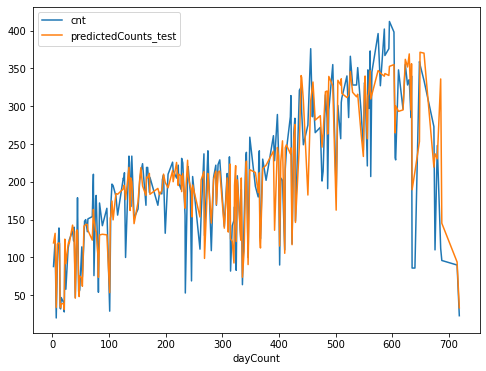

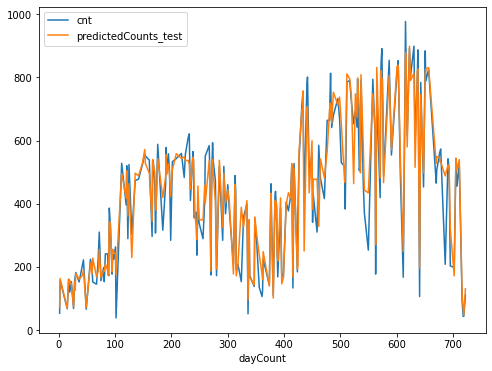

In [286]:
times = [9,18]
for time in times:
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    plt.show()

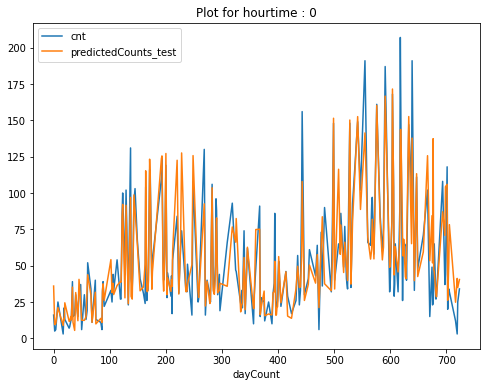

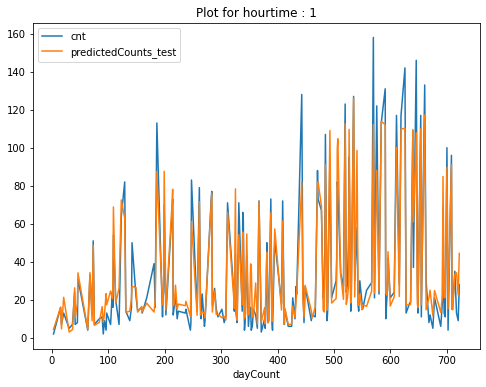

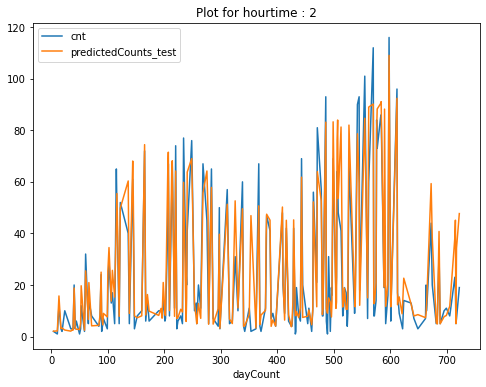

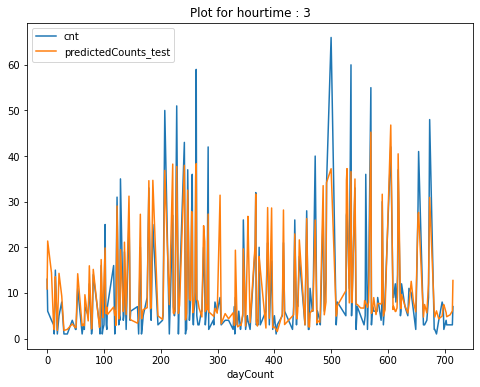

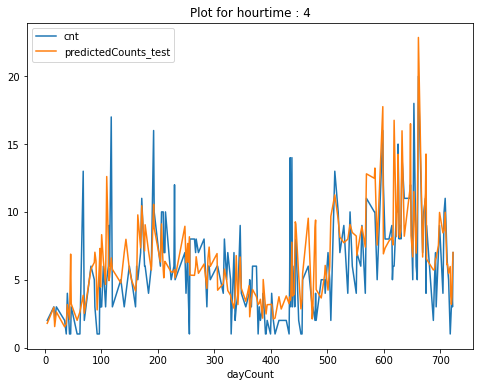

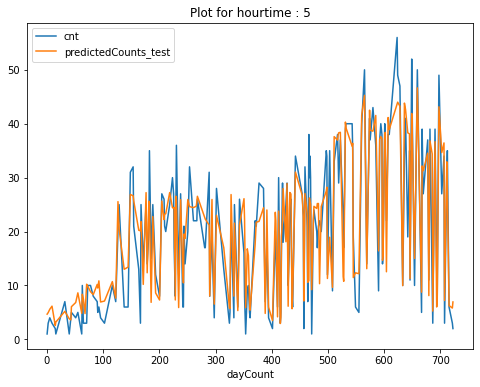

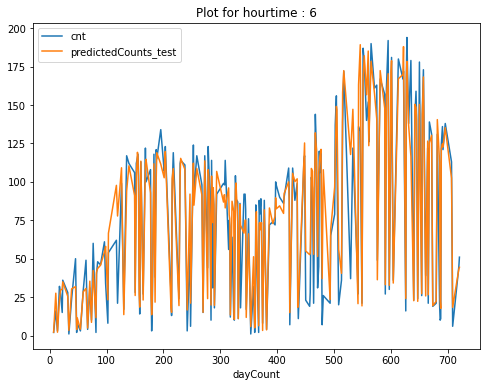

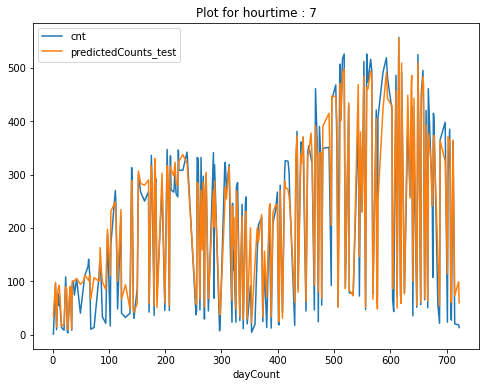

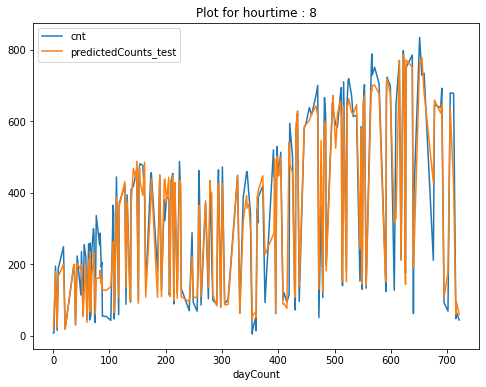

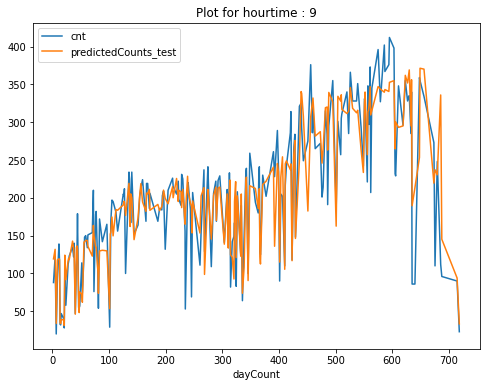

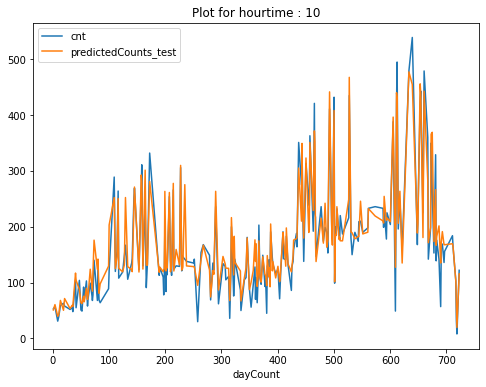

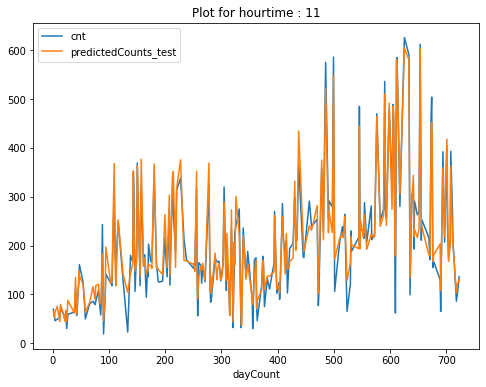

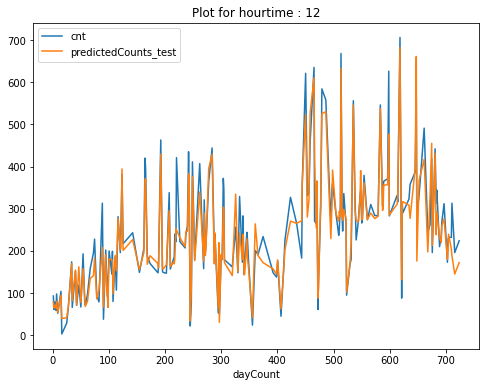

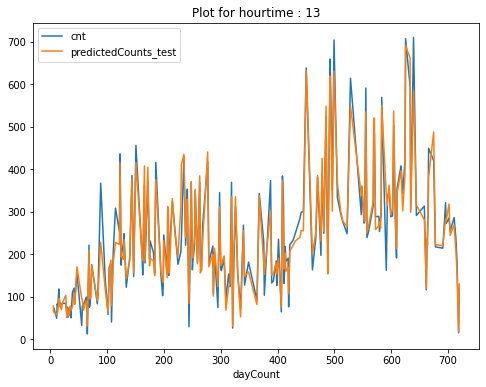

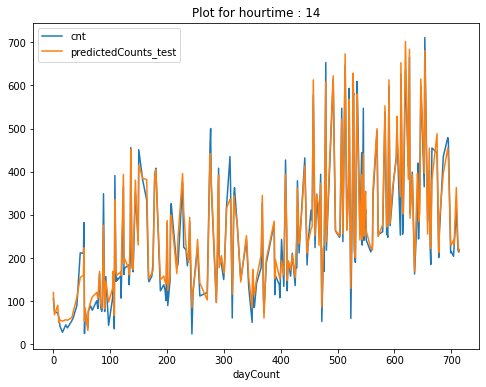

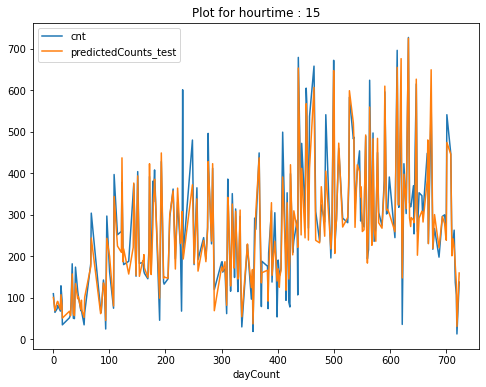

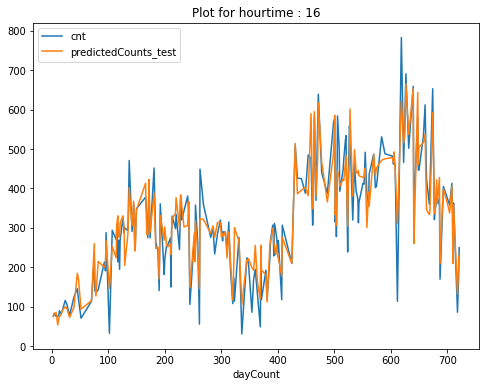

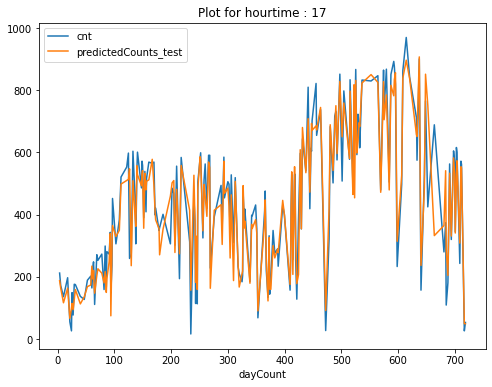

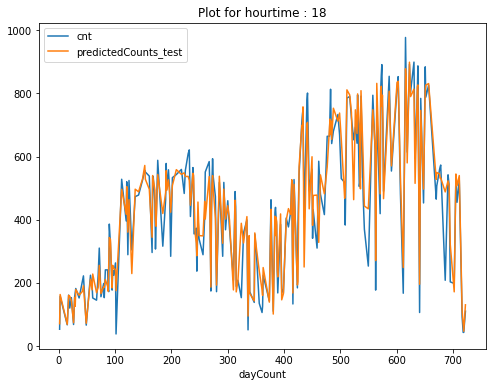

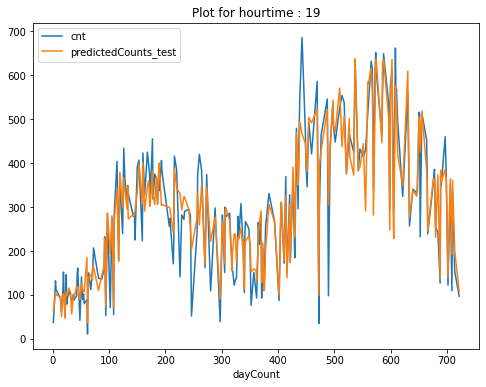

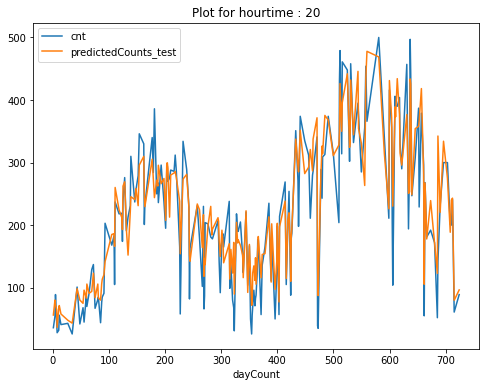

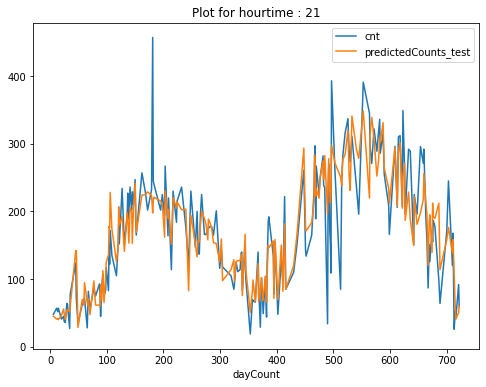

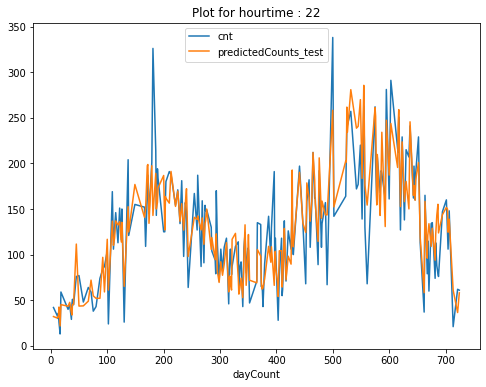

In [289]:
for time in range(0,23):
    fig = plt.figure(figsize=(8, 6))
    fig.clf()
    ax = fig.gca()
    test_set_freg_time = test_set[test_set.hr == time]
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'cnt', ax = ax)
    test_set_freg_time.plot(kind = 'line', x = 'dayCount', y = 'predictedCounts_test', ax =ax)
    ax.set_title('Plot for hourtime : {}'.format(time))
    plt.show()